In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# load the dataset 
titanic = sns.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [9]:
# show tables info and structure 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
titanic.shape

(891, 15)

In [13]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [18]:
# check null missing values 
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
titanic.isnull().mean() * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [ ]:
# Drop columns or rows with missing data 
titanic_cleaned = titanic.dropna()
titanic_no_age = titanic.drop(columns='age')

In [24]:
titanic.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [20]:
# fill missing values of age this is fill by mean 

titanic['age'].fillna(titanic['age'].mean(), inplace = True)
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [21]:
# fill missing values of embarked this is fill by mode 

titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace = True)
titanic.isnull().sum()
                        

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [34]:
# fill missing values of deck 'unknown'

print(titanic['deck'].value_counts(dropna=False))
titanic.isnull().sum()

Unknown    688
C           59
B           47
D           33
E           32
A           15
F           13
G            4
unknown      0
Name: deck, dtype: int64


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [41]:
# Basis statistics

titanic.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [44]:
titanic['class'].mode()

0    Third
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [50]:
# groupby 

# mean age by class
titanic.groupby('sex')['age'].mean()

sex
female    28.216730
male      30.505824
Name: age, dtype: float64

In [53]:
# survival rate by sex
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [55]:
# Average fare by embarkation port
titanic.groupby('embarked')['fare'].mean()

embarked
C    59.954144
Q    13.276030
S    27.243651
Name: fare, dtype: float64

In [56]:
titanic = sns.load_dataset('titanic')
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [62]:
# sorting & filtering
titanic.sort_values(by='fare',ascending = False).head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
737,1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
679,1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False


In [63]:
# filter passengers older than 60
titanic[titanic['age']>60]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
33,0,2,male,66.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
54,0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
116,0,3,male,70.5,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
170,0,1,male,61.0,0,0,33.5000,S,First,man,True,B,Southampton,no,True
252,0,1,male,62.0,0,0,26.5500,S,First,man,True,C,Southampton,no,True
275,1,1,female,63.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
280,0,3,male,65.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
326,0,3,male,61.0,0,0,6.2375,S,Third,man,True,NaN,Southampton,no,True
438,0,1,male,64.0,1,4,263.0000,S,First,man,True,C,Southampton,no,False


In [73]:
# Survival rate by class and sex
pd.pivot_table(titanic, values='survived', index='class', columns='sex')


sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


<AxesSubplot:xlabel='age', ylabel='Count'>

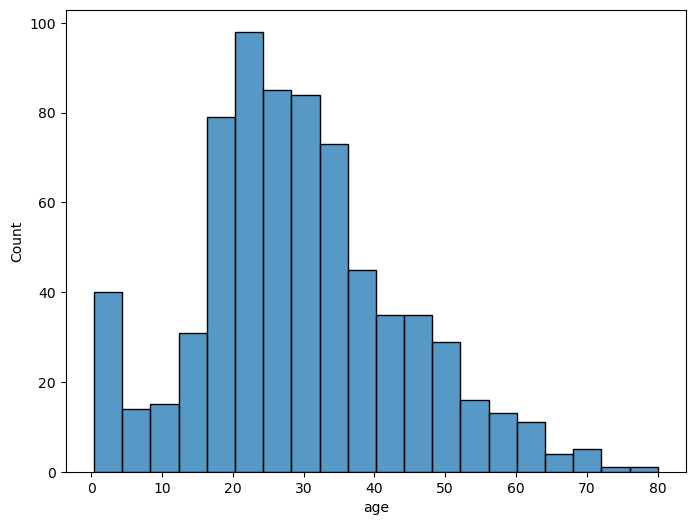

In [69]:
# ploting 

plt.figure(figsize=(8,6))
sns.histplot(data=titanic,x="age")